In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Concat all the data

## Unit conversion
The original flow data is in feet/sec/sq mile (feet3 sec-1 mile-2).

In [13]:
input_dir = r"G:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\0_data_preprocessing\\raw_data\\Coweeta\\CoweetaHydrologyLab\\daily_flow_ws02\\"

day_to_sec = 86400
sec_to_day = 1/day_to_sec

foot_to_m = 0.3048
foot3_to_m3 = foot_to_m ** 3
mile_to_m = 1609.344
mile2_to_m2 = mile_to_m **2

foot_to_mm = 304.8
foot3_to_mm3 = foot_to_mm ** 3
mile_to_mm = 1609344
mile2_to_mm2 = mile_to_mm **2

In [16]:
# Loop through the years 2015 to 2020 and read each CSV file
dfs = []  # a list to store individual DataFrames

for year in range(2015, 2021):  # 2021 is not included
    filename = f"daily_flow_ws02_{year}.csv"
    input_path = os.path.join(input_dir, filename)
    
    if os.path.exists(input_path):  # Check if the file exists
        data = pd.read_csv(input_path)

        data["flow_mm"] = data.flow * foot3_to_mm3 / sec_to_day / mile2_to_mm2
        data["flow_m"] = data.flow * foot3_to_m3 / sec_to_day / mile2_to_m2

        dfs.append(data)
    else:
        print(f"File not found: {input_path}")

# Concatenate all DataFrames into one
if dfs:  # Check if the dfs list is not empty
    all_data = pd.concat(dfs, ignore_index=True)
    print(all_data)
else:
    print("No data found.")


      year  month  day   flow  comments    flow_mm    flow_m
0     2014     11    1   0.91       NaN   0.859612  0.000860
1     2014     11    2   1.02       NaN   0.963521  0.000964
2     2014     11    3   1.14       NaN   1.076876  0.001077
3     2014     11    4   1.13       NaN   1.067430  0.001067
4     2014     11    5   1.05       NaN   0.991860  0.000992
...    ...    ...  ...    ...       ...        ...       ...
2187  2020     10   27   2.02       NaN   1.908149  0.001908
2188  2020     10   28   2.75       NaN   2.597727  0.002598
2189  2020     10   29  19.32       NaN  18.250215  0.018250
2190  2020     10   30   8.01       NaN   7.566471  0.007566
2191  2020     10   31   5.86       NaN   5.535521  0.005536

[2192 rows x 7 columns]


In [18]:
all_data['time'] = pd.to_datetime(all_data[['year', 'month', 'day']])
all_data.set_index('time', inplace=True)

In [19]:
all_data.head()

,year,month,day,flow,comments,flow_mm,flow_m
time,,,,,,,
2014-11-01,2014,11,1,0.91,NaN,0.859612,0.000860
2014-11-02,2014,11,2,1.02,NaN,0.963521,0.000964
2014-11-03,2014,11,3,1.14,NaN,1.076876,0.001077
2014-11-04,2014,11,4,1.13,NaN,1.067430,0.001067
2014-11-05,2014,11,5,1.05,NaN,0.991860,0.000992


In [23]:
out_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\0_data_preprocessing\raw_data\Coweeta\temp"
all_data[["flow_mm","flow_m"]].to_csv(os.path.join(out_dir, "flow.csv"))

<AxesSubplot:xlabel='time'>

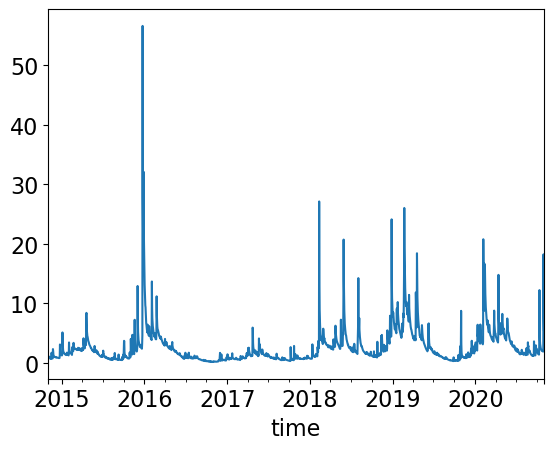

In [24]:
all_data.flow_mm.plot()

<AxesSubplot:xlabel='time'>

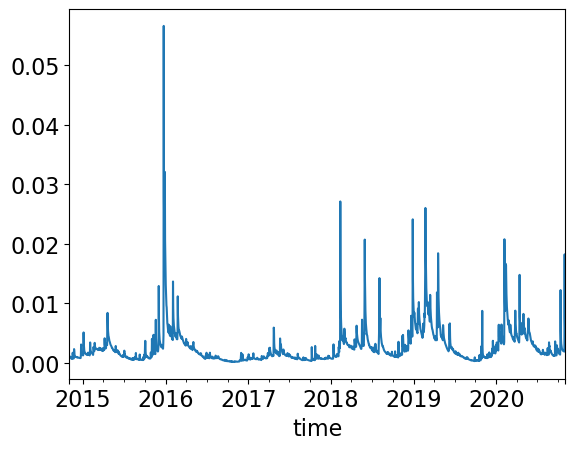

In [25]:
all_data.flow_m.plot()